**Random sample with weights**
a.k.a. multi-nomial sampling

In [17]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

clazz = {
    'a': 10,
    'b': 5,
    'c': 8,
    'd': 1,
}
weights = list(clazz.values())
cats = list(clazz.keys())
prob = np.array(weights) / np.sum(np.array(weights))
cats_with_prob = [f'{cats[i]} (Pr={np.round(prob[i], decimals=3)})' for i in range(len(cats))]
print(cats_with_prob)

['a (Pr=0.417)', 'b (Pr=0.208)', 'c (Pr=0.333)', 'd (Pr=0.042)']


**Use pytroch sampling**

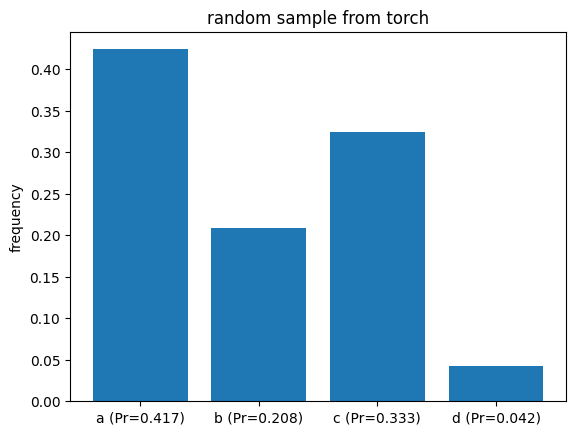

In [31]:
N = 1000
input = torch.tensor(weights).float().view(1, -1)
samples = torch.multinomial(input=input, num_samples=N, replacement=True).float()

def gen_histogram(raw_samples=None, freq=None, N=1000, title='default'):
    if freq is None:
        range_vec = np.array(list(range(len(cats)))).reshape(-1, 1) # [1,2,...,m]^T
        freq = np.sum(range_vec == raw_samples, axis=1)
    fig, ax = plt.subplots()
    ax.bar(cats_with_prob, freq/N)
    plt.ylabel('frequency')
    plt.title(title)
    plt.show()

gen_histogram(raw_samples=samples.numpy(), N=N, title='random sample from torch')


**Sample from np**

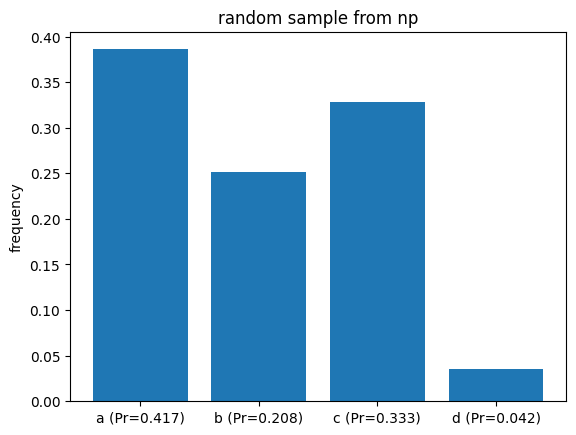

In [33]:
N = 1000
freq = np.random.multinomial(n=N, pvals=prob)
gen_histogram(freq=freq, N=N, title='random sample from np')

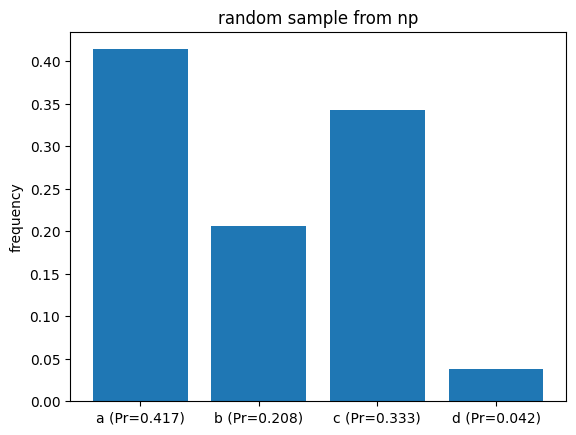

In [36]:
N = 1000
samples = np.random.multinomial(n=1, pvals=prob, size=N)
range_vec = np.array(list(range(len(cats)))).reshape(-1, 1) # [1,2,...,m]^T
samples = samples @ range_vec # lookup table
gen_histogram(raw_samples=samples.reshape(1,-1), N=N, title='random sample from np')

**My weigthed sample**

[0.41666667 0.625      0.95833333 1.        ]


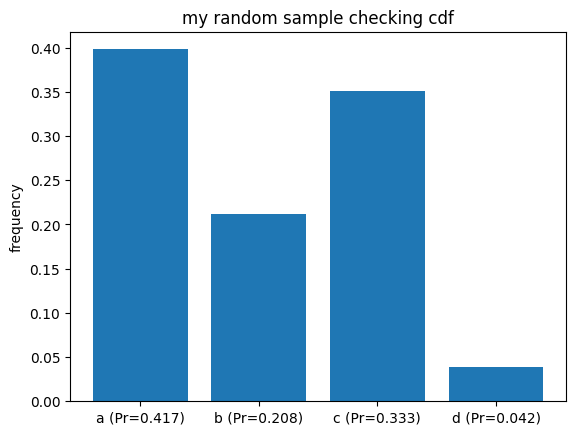

In [60]:
# with np.random.rand
N = 1000
cdf = prob @ np.tril(np.ones(shape=(len(weights),len(weights)))).T
print(cdf)
dices = np.random.rand(N,1)
samples = np.sum(dices >= cdf, axis=1)
gen_histogram(raw_samples=samples.reshape(1,-1), N=N, title='my random sample checking cdf')